
<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Optimización de funciones escalares diferenciables con `SymPy` </font> </center>




<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Extrema_example_es.svg/1200px-Extrema_example_es.svg.png" width="300px" height="100px" />

> - Mediante optimización se obtienen soluciones elegantes tanto en teoría como en ciertas aplicaciones. 
> - La teoría de optimización usa elementos comenzando con cálculo elemental y álgebra lineal básica, y luego se extiende con análisis funcional y convexo.
> - Las aplicaciones en optimización involucran ciencia, ingeniería, economía, finanzas e industria.
> - El amplio y creciente uso de la optimización lo hace escencial para estudiantes y profesionales de cualquier rama de la ciencia y la tecnología.

**Referencia:**
- http://www.math.uwaterloo.ca/~hwolkowi//henry/reports/talks.d/t06talks.d/06msribirs.d/optimportance.shtml

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/OpenStreetMap_routing_service.png/300px-OpenStreetMap_routing_service.png" width="300px" height="100px" />

Algunas aplicaciones son:

1. Ingeniería
 - Encontrar la composición de equilibrio de una mezcla de diferentes átomos.
 - Planeación de ruta para un robot (o vehículo aéreo no tripulado).
 - Planeación de la mano de obra óptima en una construcción o planta de producción.
2. Distribución óptima de recursos.
 - Distribución de rutas de vuelo.
 - Encontrar una dieta óptima.
 - Planeación de ruta óptima.
3. Optimización financiera
 - Administración de riesgos.
 - Portafolios de inversión.

En esta clase veremos aspectos básicos de optimización. En específico, veremos cómo obtener máximos y mínimos de una función escalar de una variable (como en cálculo diferencial).

___
## 0. Librerías que usaremos

Como ya dijimos en la primer clase `python` es el lenguaje de programación (el cual es de alto nivel). Sin embargo, `python` solo tiene unos pocos comandos primitivos y para hacer más fácil su uso en nuestras actividades de simulación en ingeniería, otras personas ya han escrito ciertas librerías por nosotros.

### 0.1 `NumPy`

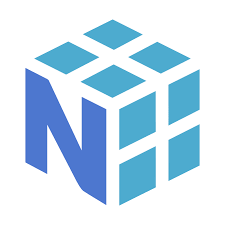

`NumPy` (Numerical Python) es la librería fundamental para computación científica (numérica) con `Python`. Contiene, entre otras cosas:
- un objeto tipo arreglo N-dimensional muy poderoso
- funciones sofisticadas
- funciones de álgebra lineal, transformada de Fourier y números aleatorios.

Por lo anterior, `NumPy` es de amplio uso entre la comunidad científica e ingenieril (por su manejo de cantidades vectoriales). De la misma manera, se usa para guardar datos. Para nuestros propósitos, se puede usar libremente.

**Referencia:**
- http://www.numpy.org/

`NumPy` ya viene incluido en la instalación estándar de Anaconda por defecto. Para comenzar a usarlo, solo debemos de importarlo:

In [1]:
# importar la librería numpy
import numpy as np

In [2]:
a = np.array([1,2,3,5])
a

array([1, 2, 3, 5])

In [3]:
a**2

array([ 1,  4,  9, 25], dtype=int32)

In [4]:
a.max()

5

In [5]:
a.min()

1

In [6]:
a.shape

(4,)

### 0.2 `SymPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="http://www.sympy.org/static/images/logo.png" width="300px" height="100px" />

`SymPy` (Symbolic Python) es una librería de `Python` para matemáticas simbólicas. Su objetivo es convertirse en un sistema de álgebra computacional con las mejores características, manteniendo el código lo más simple posible para que sea comprensible.

**Referencia:**
- http://www.sympy.org/en/index.html

`SymPy` ya viene incluido en la instalación estándar de Anaconda por defecto. Para comenzar a usarlo, solo debemos de importarlo:

In [7]:
# importar la librería sympy
import sympy as sym

In [8]:
help(sym.init_printing)

Help on function init_printing in module sympy.interactive.printing:

init_printing(pretty_print=True, order=None, use_unicode=None, use_latex=None, wrap_line=None, num_columns=None, no_global=False, ip=None, euler=False, forecolor=None, backcolor='Transparent', fontsize='10pt', latex_mode='plain', print_builtin=True, str_printer=None, pretty_printer=None, latex_printer=None, scale=1.0, **settings)
    Initializes pretty-printer depending on the environment.
    
    Parameters
    
    pretty_print : boolean, default=True
        If True, use pretty_print to stringify or the provided pretty
        printer; if False, use sstrrepr to stringify or the provided string
        printer.
    order : string or None, default='lex'
        There are a few different settings for this parameter:
        lex (default), which is lexographic order;
        grlex, which is graded lexographic order;
        grevlex, which is reversed graded lexographic order;
        old, which is used for compatibil

In [9]:
sym.init_printing(use_latex='mathjax')

$$y=f(x)=x^2$$

La funcionalidad de imprimir en formato LaTex que nos da `SymPy` mediante el proyecto `mathjax` hace de `SymPy` una herramienta muy atractiva...

Notar que en `SymPy` y en `NumPy` existen funciones con el mismo nombre, pero reciben tipos de datos diferentes...

In [10]:
sym.sin(3.1416)

-7.34641020664359e-6

In [11]:
np.sin(3.1416)

-7.346410206643587e-06

In [12]:
vector = np.array([0,3.1416/2,3.1416/3,3.1416/4])
vector

array([0.    , 1.5708, 1.0472, 0.7854])

In [13]:
sin_vector = np.sin(vector)
sin_vector

array([0.        , 1.        , 0.86602663, 0.70710808])

In [14]:
sym.sin(vector)

AttributeError: 'ImmutableDenseNDimArray' object has no attribute 'could_extract_minus_sign'

In [15]:
import numpy as np

In [16]:
# from sympy import *
# from numpy import *
# Esta práctica no es para nada recomendable.

### 0.3 `PyPlot` de `matplotlib`

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://matplotlib.org/_static/logo2.svg" width="300px" height="100px" />

El módulo `PyPlot` de la librería `matplotlib` contiene funciones que nos permite generar una gran cantidad de gráficas rápidamente. Las funciones de este módulo están escritas con el mismo nombre que las funciones para graficar en `Matlab`.

**Referencia:**
- https://matplotlib.org/api/pyplot_summary.html

In [17]:
# importar matplotlib.pyplot

# Lo siguiente es equivalente
# from matplotlib import pyplot as plt
# comando para que las gráficas salgan en la misma ventana
%matplotlib inline

In [18]:
import matplotlib.pyplot as plt

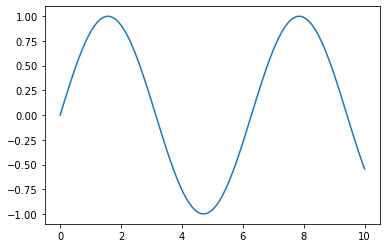

In [19]:
x = np.linspace(0,10,100)
plt.plot(x,np.sin(x))
plt.show()

Ya que revisamos todas las librerías que usaremos, empecemos con la clase como tal...

___
Basamos todos los resultados en los siguientes teoremas:

## 1. Teorema de Fermat (análisis)

Si una función $f(x)$ alcanza un máximo o mínimo local en $x=c$, y si la derivada $f'(c)$ existe en el punto $c$, entonces $f'(c) = 0$.

### Ejemplo

Sabemos que la función $f(x)=x^2$ tiene un mínimo global en $x=0$, pues

$$f(x)=x^2\geq0,\qquad\text{y}\qquad f(x)=x^2=0 \qquad\text{si y solo si}\qquad x=0.$$

In [20]:
# declarar la variable real x
sym.var('x')

x

In [21]:
# declarar ahora f=x^2 y mostrar
f = x**2
f

 2
x 

In [22]:
# derivar f respecto a x y mostrar
df = sym.diff(f,x)
df

2⋅x

In [23]:
# resolver f'(x)=0 y mostrar soluciones
soluciones = sym.solve(df,x)
soluciones 

[0]

In [24]:
# Encuentra también soluciones complejas x^2+1 =0 
s2 = sym.solve(x**2 + 1, x)
s2

[-ⅈ, ⅈ]

In [25]:
s2[0], s2[1]

(-ⅈ, ⅈ)

In [26]:
# Puedo resolver ecuaciones que involucren más de una variable
sym.var('y')
s3 = sym.solve(x**3+y, x)
s3

⎡          3 ____        3 ____    3 ____        3 ____⎤
⎢3 ____    ╲╱ -y    √3⋅ⅈ⋅╲╱ -y     ╲╱ -y    √3⋅ⅈ⋅╲╱ -y ⎥
⎢╲╱ -y , - ────── - ───────────, - ────── + ───────────⎥
⎣            2           2           2           2     ⎦

Veamos la gráfica...

In [27]:
f

 2
x 

In [28]:
# convertir f e una función que se pueda evaluar numéricamente (función lambdify de la librería sympy)
f_num = sym.lambdify(x,f,modules='numpy')

In [29]:
f

 2
x 

In [30]:
f_num(np.array([2,1,5,9]))


array([ 4,  1, 25, 81], dtype=int32)

In [31]:
# Coordenadas x (abscisas)
x_num = np.linspace(-5,5)
x_num

array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
       -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
       -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
       -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
       -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
        0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
        1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
        2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
        3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
        4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ])

In [32]:
f_num(x_num)

array([2.50000000e+01, 2.30008330e+01, 2.10849646e+01, 1.92523948e+01,
       1.75031237e+01, 1.58371512e+01, 1.42544773e+01, 1.27551020e+01,
       1.13390254e+01, 1.00062474e+01, 8.75676801e+00, 7.59058726e+00,
       6.50770512e+00, 5.50812162e+00, 4.59183673e+00, 3.75885048e+00,
       3.00916285e+00, 2.34277384e+00, 1.75968347e+00, 1.25989171e+00,
       8.43398584e-01, 5.10204082e-01, 2.60308205e-01, 9.37109538e-02,
       1.04123282e-02, 1.04123282e-02, 9.37109538e-02, 2.60308205e-01,
       5.10204082e-01, 8.43398584e-01, 1.25989171e+00, 1.75968347e+00,
       2.34277384e+00, 3.00916285e+00, 3.75885048e+00, 4.59183673e+00,
       5.50812162e+00, 6.50770512e+00, 7.59058726e+00, 8.75676801e+00,
       1.00062474e+01, 1.13390254e+01, 1.27551020e+01, 1.42544773e+01,
       1.58371512e+01, 1.75031237e+01, 1.92523948e+01, 2.10849646e+01,
       2.30008330e+01, 2.50000000e+01])

In [33]:
soluciones

[0]

In [34]:
f_num(np.array(soluciones[0]))

0

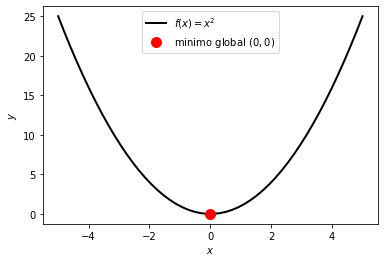

In [35]:
#Graficar
plt.figure(figsize=(6,4))
plt.plot(x_num, #puntos x
         f_num(x_num), # puntos en y
         'k', #color negro
         lw=2, # grosor de linea
         label= '$f(x)=x^2$') # Etiqueta de la gráfica
plt.plot(soluciones[0], #coordenas en x
        f_num(np.array(soluciones[0])), # coordenadas en y
        'ro', # punto rojo
         ms=10, # grosor del punto
         label ='minimo global $(0,0)$')# Etiqueta

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
        
#Graficando el punto mínimo


Ver diferencias entre f y f_num

In [36]:
f

 2
x 

In [37]:
f_num(12)

144

**Otra manera de hacer lo anterior**

Concepto de función...

In [38]:
# Concepto de función
# def nombre_de_la_funcion(argumento[s]):
#     --> Operación 1
#     --> Operación 2
#     --> ...
#     --> Operación N
#     return [lo que vaya a devolver]


In [39]:
def h(z):
    return z**2

In [40]:
h(x)

 2
x 

In [41]:
h(5)

25

In [42]:
dh = sym.diff(h(x),x)
dh

2⋅x

In [43]:
soluciones = sym.solve(dh,x)
soluciones

[0]

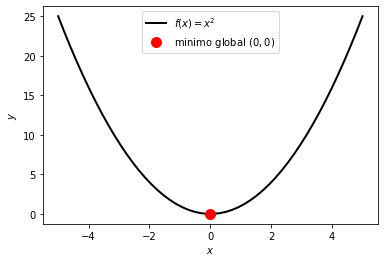

In [44]:
#Graficar
plt.figure(figsize=(6,4))
plt.plot(x_num, #puntos x
         h(x_num), # puntos en y
         'k', #color negro
         lw=2, # grosor de linea
         label= '$f(x)=x^2$') # Etiqueta de la gráfica
plt.plot(soluciones[0], #coordenas en x
        h(np.array(soluciones[0])), # coordenadas en y
        'ro', # punto rojo
         ms=10, # grosor del punto
         label ='minimo global $(0,0)$')# Etiqueta

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
        
#Graficando el punto mínimo


El converso del teorema anterior no es cierto.

### Actividad
Considere $g(x)=x^3$. 
- Usando `sympy`, muestre que $g'(0)=0$.
- Sin embargo, descartar que $x=0$ es un extremo de $g(x)$ viendo su **gráfica**.

In [45]:
# Declarar la variable simbolica x
sym.var('x')

x

In [46]:
# Definimos funcion g(x)
def g(x):
    return x**3

In [47]:
# Derivamos g(x)
dg = sym.diff(g(x),x)
dg

   2
3⋅x 

In [48]:
# Puntos criticos (sym.solve(dg,x))
soluciones = sym.solve(dg,x)
soluciones

[0]

In [49]:
x_num = np.linspace(-10,10)
x_num

array([-10.        ,  -9.59183673,  -9.18367347,  -8.7755102 ,
        -8.36734694,  -7.95918367,  -7.55102041,  -7.14285714,
        -6.73469388,  -6.32653061,  -5.91836735,  -5.51020408,
        -5.10204082,  -4.69387755,  -4.28571429,  -3.87755102,
        -3.46938776,  -3.06122449,  -2.65306122,  -2.24489796,
        -1.83673469,  -1.42857143,  -1.02040816,  -0.6122449 ,
        -0.20408163,   0.20408163,   0.6122449 ,   1.02040816,
         1.42857143,   1.83673469,   2.24489796,   2.65306122,
         3.06122449,   3.46938776,   3.87755102,   4.28571429,
         4.69387755,   5.10204082,   5.51020408,   5.91836735,
         6.32653061,   6.73469388,   7.14285714,   7.55102041,
         7.95918367,   8.36734694,   8.7755102 ,   9.18367347,
         9.59183673,  10.        ])

In [50]:
g(x_num)

array([-1.00000000e+03, -8.82480939e+02, -7.74549720e+02, -6.75798349e+02,
       -5.85818834e+02, -5.04203181e+02, -4.30543396e+02, -3.64431487e+02,
       -3.05459460e+02, -2.53219322e+02, -2.07303079e+02, -1.67302740e+02,
       -1.32810309e+02, -1.03417794e+02, -7.87172012e+01, -5.83005380e+01,
       -4.17598110e+01, -2.86870267e+01, -1.86741919e+01, -1.13133133e+01,
       -6.19639776e+00, -2.91545190e+00, -1.06248247e+00, -2.29496213e-01,
       -8.49985975e-03,  8.49985975e-03,  2.29496213e-01,  1.06248247e+00,
        2.91545190e+00,  6.19639776e+00,  1.13133133e+01,  1.86741919e+01,
        2.86870267e+01,  4.17598110e+01,  5.83005380e+01,  7.87172012e+01,
        1.03417794e+02,  1.32810309e+02,  1.67302740e+02,  2.07303079e+02,
        2.53219322e+02,  3.05459460e+02,  3.64431487e+02,  4.30543396e+02,
        5.04203181e+02,  5.85818834e+02,  6.75798349e+02,  7.74549720e+02,
        8.82480939e+02,  1.00000000e+03])

In [51]:
soluciones[0]

0

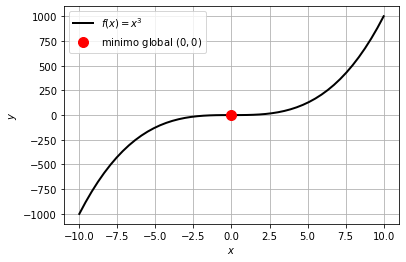

In [53]:
# graficar
#Graficar
plt.figure(figsize=(6,4))
plt.plot(x_num, #puntos x
         g(x_num), # puntos en y
         'k', #color negro
         lw=2, # grosor de linea
         label= '$f(x)=x^3$') # Etiqueta de la gráfica
plt.plot(soluciones[0], #coordenas en x
        g(np.array(soluciones[0])), # coordenadas en y
        'ro', # punto rojo
         ms=10, # grosor del punto
         label ='minimo global $(0,0)$')# Etiqueta

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()        

## 2. Criterio de la segunda derivada

Sea $f(x)$ una función tal que $f’(c)=0$ y cuya segunda derivada existe en un intervalo abierto que contiene a $c$.
- Si $f’’(c)>0$, entonces $f(c)$ es un mínimo relativo.
- Si $f’’(c)<0$, entonces $f(c)$ es un máximo relativo.
- Si $f’’(c)=0$, entonces el criterio no decide. 

### Ejemplo

Mostrar, usando `sympy`, que la función $f(x)=x^2$ tiene un mínimo relativo en $x=0$.

Ya vimos que $f'(0)=0$. Notemos que:

In [56]:
f = x**2
f

 2
x 

In [58]:
# Sacamos la segunda derivada
df = sym.diff(f,x)
df

2⋅x

In [59]:
d2f = sym.diff(df,x)
d2f

2

In [62]:
soluciones = sym.solve(df,x)
soluciones

[0]

In [60]:
help(df.subs)

Help on method subs in module sympy.core.basic:

subs(*args, **kwargs) method of sympy.core.mul.Mul instance
    Substitutes old for new in an expression after sympifying args.
    
    `args` is either:
      - two arguments, e.g. foo.subs(old, new)
      - one iterable argument, e.g. foo.subs(iterable). The iterable may be
         o an iterable container with (old, new) pairs. In this case the
           replacements are processed in the order given with successive
           patterns possibly affecting replacements already made.
         o a dict or set whose key/value items correspond to old/new pairs.
           In this case the old/new pairs will be sorted by op count and in
           case of a tie, by number of args and the default_sort_key. The
           resulting sorted list is then processed as an iterable container
           (see previous).
    
    If the keyword ``simultaneous`` is True, the subexpressions will not be
    evaluated until all the substitutions have been

In [64]:
#- Si $f’’(c)>0$, entonces $f(c)$ es un mínimo relativo.
#- Si $f’’(c)<0$, entonces $f(c)$ es un máximo relativo.
#- Si $f’’(c)=0$, entonces el criterio no decide. 

d2f.subs({x:soluciones[0]})

2

In [65]:
# crear una función que se llame criterio_segunda_derivada(d2f, soluciones) regrese la desición

def criterio_segunda_derivada(d2f, soluciones):
    d2f_c = d2f.subs({x:soluciones[0]})
    
    if d2f_c >0:
        desicion = 'es un mínimo relativo'
    elif d2f_c <0:
        desicion = 'es un máximo relativo'
    else:
        desicion = 'el criterio no decide'  
        
    return desicion

In [66]:
criterio_segunda_derivada(d2f, soluciones)

'es un mínimo relativo'

In [ ]:
# Formas equivalentes de obtener la segunda derivada

# Formas
#d2f = sym.diff(f,x,x)
#d2f = sym.diff(f,x,2)

Por tanto, por el criterio de la segunda derivada, $f(0)=0$ es un mínimo relativo (en efecto, el mínimo global).

### Ejemplo
¿Qué pasa con $g(x)=x^3$ al intentar utilizar el criterio de la segunda derivada? (usar `sympy`).

In [69]:
x

x

In [70]:
# Definimos la función g(x)=x^3
def g(x):
    return x**3

In [71]:
# Sacamos la derivada de la función g respecto a x g'(x)=3x^2
dg = sym.diff(g(x),x)
dg

   2
3⋅x 

In [72]:
d2g = sym.diff(g(x),x,2)
d2g

6⋅x

In [74]:
solucion = sym.solve(g(x),x)
solucion

[0]

In [ ]:
# Observamos que g'(0)=0 (es un punto crítico)


In [ ]:
# Obtenemos la segunda derivada de la función g respecto a x g''(x)=6x


In [75]:
# Evaluamos g''(0)
criterio_segunda_derivada(d2g, solucion)

'el criterio no decide'

Como $g''(0)=0$ entonces el criterio de la segunda derivada no concluye.

### Actividad

¿Qué pasa con $h(x)=x^4$ al intentar utilizar el criterio de la segunda derivada?.

In [ ]:
# 1.- definir la variable simbólica

In [ ]:
# 2.- Definir la función

In [ ]:
# 3.- Derivar la función

In [ ]:
# 4.- Encontrar los puntos críticos

In [ ]:
# 5.- Probar el criterio de la segunda derivada para ver
#     si el pto crítico es mínimo o máximo relativo



## 3. Método para determinar extremos absolutos de una función continua y=f(x) en [a,b] 

- Determinar todos los valores críticos $c_1, c_2, c_3, \dots, c_n$ en $(a,b)$.
- Evaluar $f$ en todos los valores críticos y en los extremos $x=a$ y $x=b$.
- El más grande y el más pequeño de los valores de la lista $f(a), f(b), f(c_1), f(c_2), \dots, f(c_n)$ son el máximo absoluto y el mínimo absoluto, respectivamente, de f en el intervalo [a,b].

### Ejemplo

Determinar los extremos absolutos de $f(x)=x^2-6x$ en $\left[0,5\right]$.

Obtenemos los puntos críticos de $f$ en $\left[0,5\right]$:

In [77]:
# Definimos f
def f(x):
    return x**2-6*x

In [78]:
# Derivamos f
df = sym.diff(f(x),x)
df

2⋅x - 6

In [79]:
# Resolver la ecuación f'(x)=0 para encontrar puntos críticos
p_criticos = sym.solve(df,x)
p_criticos

[3]

Evaluamos $f$ en los extremos y en los puntos críticos:

In [80]:
f(0),f(5), f(p_criticos[0])

(0, -5, -9)

Concluimos que el máximo absoluto de $f$ en $\left[0,5\right]$ es $0$ y se alcanza en $x=0$, y que el mínimo absoluto es $-9$ y se alcanza en $x=3$.

In [81]:
x_num = np.linspace(0,5)
x_num

array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])

In [82]:
f(x_num)

array([ 0.        , -0.60183257, -1.18284048, -1.74302374, -2.28238234,
       -2.80091628, -3.29862557, -3.7755102 , -4.23157018, -4.6668055 ,
       -5.08121616, -5.47480217, -5.84756352, -6.19950021, -6.53061224,
       -6.84089963, -7.13036235, -7.39900042, -7.64681383, -7.87380258,
       -8.07996668, -8.26530612, -8.42982091, -8.57351104, -8.69637651,
       -8.79841733, -8.87963349, -8.94002499, -8.97959184, -8.99833403,
       -8.99625156, -8.97334444, -8.92961266, -8.86505623, -8.77967514,
       -8.67346939, -8.54643898, -8.39858392, -8.22990421, -8.04039983,
       -7.8300708 , -7.59891712, -7.34693878, -7.07413578, -6.78050812,
       -6.46605581, -6.13077884, -5.77467722, -5.39775094, -5.        ])

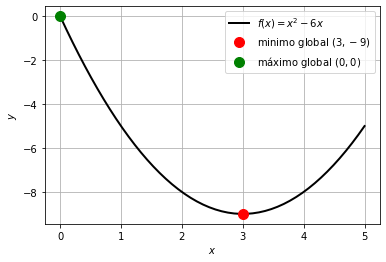

In [85]:
#Graficar
plt.figure(figsize=(6,4))
plt.plot(x_num, #puntos x
         f(x_num), # puntos en y
         'k', #color negro
         lw=2, # grosor de linea
         label= '$f(x)=x^2 - 6x$') # Etiqueta de la gráfica
plt.plot(p_criticos[0], #coordenas en x
        f(np.array(p_criticos[0])), # coordenadas en y
        'ro', # punto rojo
         ms=10, # grosor del punto
         label ='minimo global $(3,-9)$')# Etiqueta
plt.plot(0, #coordenas en x
        f(0), # coordenadas en y
        'go', # punto rojo
         ms=10, # grosor del punto
         label ='máximo global $(0,0)$')# Etiqueta

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

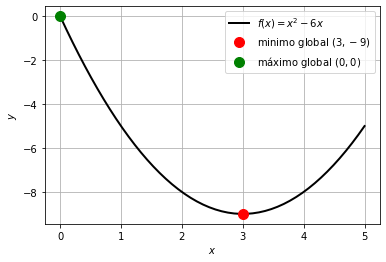

In [86]:
#Graficar
plt.figure(figsize=(6,4))
plt.plot(x_num, #puntos x
         f(x_num), # puntos en y
         'k', #color negro
         lw=2, # grosor de linea
         label= '$f(x)=x^2 - 6x$') # Etiqueta de la gráfica
plt.plot(p_criticos[0], #coordenas en x
        f(np.array(p_criticos[0])), # coordenadas en y
        'ro', # punto rojo
         ms=10, # grosor del punto
         label =f'minimo global $({p_criticos[0]},{f(np.array(p_criticos[0]))})$')# Etiqueta
plt.plot(0, #coordenas en x
        f(0), # coordenadas en y
        'go', # punto rojo
         ms=10, # grosor del punto
         label =f'máximo global $({0},{f(0)})$')# Etiqueta

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### Actividad
Determinar los valores extremos absolutos de $h(x)=x^3-3x$ en $\left[-2.2,1.8\right]$, usando `sympy`. Mostrar en una gráfica.

### En varias variables...

El procedimiento es análogo. 

Si una función $f:\mathbb{R}^n\to\mathbb{R}$ alcanza un máximo o mínimo local en $\boldsymbol{x}=\boldsymbol{c}\in\mathbb{R}^n$, y $f$ es diferenciable en el punto $\boldsymbol{x}=\boldsymbol{c}$, entonces $\left.\frac{\partial f}{\partial \boldsymbol{x}}\right|_{\boldsymbol{x}=\boldsymbol{c}}=\boldsymbol{0}$ (todas las derivadas parciales en el punto $\boldsymbol{x}=\boldsymbol{c}$ son cero).

**Criterio de la segunda derivada:** para ver si es máximo o mínimo, se toma la segunda derivada (matriz jacobiana) y se verifica definición negativa o positiva, respectivamente.

Si se restringe a cierta región, hay ciertas técnicas. La más general, pero también la más compleja es la de **multiplicadores de Lagrange**.

**Ejemplo:** hacer a mano a la vez para corroborar...

In [88]:
sym.var('x y')

(x, y)

In [89]:
def f(x,y):
    return x**2+y**2

In [90]:
dfx=sym.diff(f(x,y),x)
dfx

2⋅x

In [91]:
dfy=sym.diff(f(x,y),y)
dfy

2⋅y

In [93]:
xy_c = sym.solve([dfx,dfy],[x,y])
xy_c

{x: 0, y: 0}

In [95]:
xy_c[x]

0

In [96]:
xy_c[y]

0

In [97]:
x_c = xy_c[x]
y_c = xy_c[y]
x_c,y_c

(0, 0)

In [98]:
d2fx =sym.diff(f(x,y),x,2)
d2fy =sym.diff(f(x,y),y,2)
dfxy =sym.diff(f(x,y),x,y)

JF = sym.Matrix([[d2fx, dfxy], [dfxy, d2fy]])
JF

⎡2  0⎤
⎢    ⎥
⎣0  2⎦

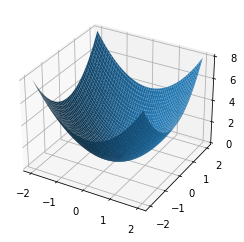

In [103]:
# graficar
fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')
x_num = np.linspace(-2,2,100)
y_num = np.linspace(-2,2,100)

X,Y =np.meshgrid(x_num,y_num)

ax.plot_surface(X,Y,f(X,Y))
ax.plot([x_c],[y_c], [f(x_c,y_c)], '*r')

### Problema:
Se desea construir una lata cilíndrica de 250 $ml$ ¿Cuál es el radio de la base ($r$) y la altura del cilíndro ($h$) para minimizar la superficie?

1. Identificar qué se quiere minimizar (o maximizar):

    **Solución**
    
    Minimizar la superficie de un cilíndro ($S$).
    
    $$
    S=A_B+A_R,
    $$
    donde $A_B$ es el área de la base y $A_R$ es el área de la zona recta.
    $$
    A_B=\pi r^2,
    $$
    $$
    A_R=h \pi2r.
    $$
    
    Entonces $S=\pi r^2+h\pi2r$.
    
2. Incluir las restricciones:

    **Solución**
    
    El volumen ($V$) debe ser 250 $ml$=250 $cm^3$.
    
    $$
    V=\pi r^2h=250.
    $$
    
    Por lo que $h=\frac{250}{\pi r^2}$. Sustituyendo en $S$
    $$
    S=\pi r^2+\frac{250}{\pi r^2}\pi2r,
    $$
    simplificando, tenemos
    $$
    S=\pi r^2+\frac{500}{r}.
    $$

# Anuncios

## 1. [Curso gratis sugerido](https://www.kaggle.com/learn/python)
